In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

Text(0, 0.5, 'Energy [J]')

<Figure size 2500x2000 with 0 Axes>

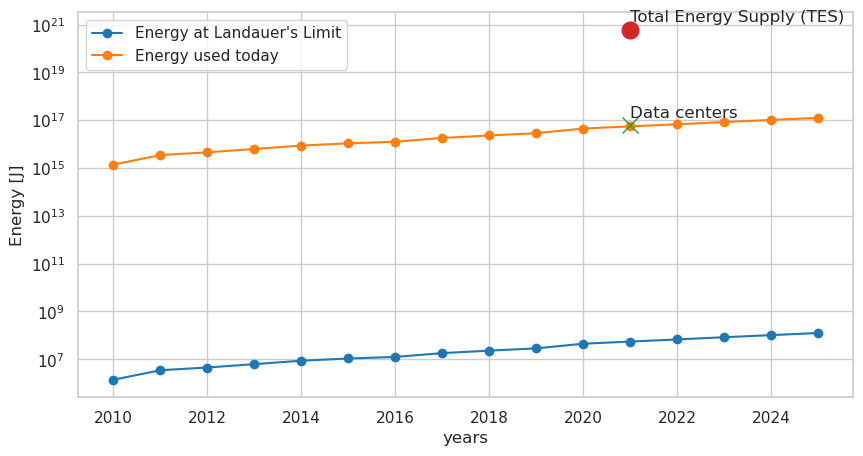

In [5]:
sns.set_context("notebook")
energy_generated = 14500 * 11.63 # 14500 Mtoe to TWh per year Source: https://en.wikipedia.org/wiki/World_energy_supply_and_consumption#Total_energy_supply
energy_generated = energy_generated * 3.6e15 # TWh per year to Joules per year
data_centers = 17e12 * 3600 # 17e9 kWh in Joules Source: https://www.borderstep.de/wp-content/uploads/2022/08/Borderstep_Rechenzentren_2021_eng.pdf

data_generated = [2, 5, 6.5, 9, 12.5, 15.5, 18, 26, 33, 41, 64.2, 79, 97, 120, 147, 181] # Zettabytes per year Source: https://explodingtopics.com/blog/data-generated-per-day
years = [i for i in range(2010, 2026)]

df = pd.DataFrame({'data_generated': data_generated, 'years': years}) # Create dataframe
df["data_generated"] = df["data_generated"] * 3e4 # 30KB of computed bits to generate 1 Byte of data (my assumption)
df["energy_generated"] = energy_generated
df["data_centers"] = data_centers

df["energy_landauer"] = df["data_generated"] * 8 * 1e21 * 2.9e-21 # 8 bits in a byte, 1e21 zettabits to bits, and 2.9e-21 is Landauer's energy in Joules per bit computed
df["energy_today"] = df["energy_landauer"] * 1e9 # Computers operate with one billion more energy than Landauer's limit (wiki has one sentence about this. Need to find a better source)

# Plot and use dots for markers
plt.figure(figsize=(25,20))
ax = df.plot(x="years", y=["energy_landauer", "energy_today",], marker='o', logy=True, figsize=(10, 5))
ax.plot(2021,data_centers, marker='x', markersize=12)
ax.annotate('Data centers', xy=(2021, data_centers), xytext=(2021, data_centers * 2.2)),
ax.plot(2021,energy_generated, marker='o', markersize=12)
ax.annotate('Total Energy Supply (TES)', xy=(2021, energy_generated), xytext=(2021, energy_generated * 2.2)),
plt.grid(which='minor')
plt.legend(["Energy at Landauer's Limit", "Energy used today"] ,loc='upper left')
plt.ylabel("Energy [J]")